In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [75]:
df_train =pd.read_csv('train_PDjVQMB.csv')
df_test=pd.read_csv('test_lTY72QC.csv')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [20]:
df_train.head(10)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
5,e7a8332a,31,Female,Less than 5L,111026.79,4,1,1,0,Good,0
6,f2de1836,56,Male,Less than 5L,1072102.23,2,1,2,1,Average,0
7,f422388a,41,Female,10L - 15L,1587489.75,4,0,1,1,Poor,1
8,773aa149,60,Female,10L - 15L,1465812.54,0,0,1,1,Poor,1
9,443be80f,32,Female,5L - 10L,770796.81,3,0,1,1,Poor,0


In [21]:
df_train.nunique()

ID                    6650
Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

# Data Preprocessing

In [22]:
df_train['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [23]:
df_train.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [24]:
# Display Summary of the DataSet

df_train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [25]:
df_train.columns


Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object')

# Feature Engineering


In [26]:
# Copying Data to new DataFrame by dropping ID Column because its not required for Feature Engineering

df_copy=df_train.drop('ID',axis = 1)
df_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [27]:
df_copy.Is_Churn.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [28]:
# From above there is Imbalance Classes Class : '0' is Majority Class and Class : '1' is Minority Class.
# So to Overcome from this Situation we have to done Sampling.
# So here is Two Sampling : Under Sampling and Over Sampling
# Here Over Sampling is good fit because if UnderSampling is done to the dataset will be low and the Prediction will good enough
# So OverSampling is done to Overcome the Class Imbalance Situation

from sklearn.utils import resample
df_majority = df_copy.loc[df_copy.Is_Churn == 0].copy()
df_minority = df_copy.loc[df_copy.Is_Churn == 1].copy()

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                             n_samples=4500,  # to match majority class
                             random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
df_copy = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_copy.Is_Churn.value_counts())

0    5113
1    4500
Name: Is_Churn, dtype: int64


In [29]:
# So in the DataSet there is Categorical and Numerical Column
# For Categorical Columns we apply LabelEncoder to encode them
# for Categorical Columns with Two Class using LabelEncoder and for More than two Using OrdinalEncoder


# Import Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns
for column in df_copy.columns:
    if df_copy[column].dtype == object and column != 'ID':
        if df_copy[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_copy[column] = le.fit_transform(df_copy[column]) 
        else:
            dummy_columns.append(column)
#apply get dummies for selected columns
#df_copy = pd.get_dummies(data = df_copy,columns = dummy_columns)

In [30]:
# Import OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df_copy[dummy_columns])
df_copy[dummy_columns] = pd.DataFrame(data_encoded, columns=dummy_columns)
df_copy

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,53,0,3.0,875572.11,2,1,1.0,1,2.0,0
2,35,0,2.0,701607.06,2,1,0.0,0,1.0,0
5,31,0,0.0,111026.79,4,1,1.0,0,2.0,0
6,56,1,0.0,1072102.23,2,1,0.0,1,0.0,0
9,32,0,1.0,770796.81,3,0,1.0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...
2046,51,1,2.0,1082493.99,4,1,0.0,1,2.0,1
1299,24,1,3.0,107604.00,2,1,1.0,1,1.0,1
662,61,0,2.0,745776.72,0,0,0.0,1,1.0,1
79,48,0,2.0,307604.07,0,1,0.0,0,2.0,1


In [31]:
features = df_copy.columns.tolist()
features.remove('Is_Churn')
features  

['Age',
 'Gender',
 'Income',
 'Balance',
 'Vintage',
 'Transaction_Status',
 'Product_Holdings',
 'Credit_Card',
 'Credit_Category']

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_copy.values, i) for i in range(len(features))]
vif["Features"] = features
vif


# So here Checking for MutliCollinearity 
# here VIF value > 5 has high MultiCollinearity which is Age Column
# So to Solve this Problem we Standarise or done Normalization.

,VIF,Features
0,9.827571,Age
1,2.030183,Gender
2,2.422756,Income
3,3.274118,Balance
4,3.171564,Vintage
5,1.934420,Transaction_Status
6,1.911552,Product_Holdings
7,2.848908,Credit_Card
8,2.660424,Credit_Category


In [80]:
# So applying MinMaxScaler to Age to deal with MultiCollinearity
# Also applying for Balance Column because it contains Outlier as we seen in Data Visualization(BoxPlot) 

# Import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
col_names = ['Age','Balance']
features1 = df_copy[col_names]
features2=df_test[col_names]
scaler =  MinMaxScaler().fit(features1.values)
features1 = scaler.transform(features1.values)
scaler =  MinMaxScaler().fit(features2.values)
features2 = scaler.transform(features2.values)
df_test[col_names]=features2
df_copy[col_names] = features1
df_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,0.627451,0,3.0,0.359323,2,1,1.0,1,2.0,0
2,0.274510,0,2.0,0.287925,2,1,0.0,0,1.0,0
5,0.196078,0,0.0,0.045541,4,1,1.0,0,2.0,0
6,0.686275,1,0.0,0.439982,2,1,0.0,1,0.0,0
9,0.215686,0,1.0,0.316321,3,0,1.0,1,2.0,0


In [34]:
# Now the MultiCollinearity is Low or removed now we can move for further process

from statsmodels.stats.outliers_influence import variance_inflation_factor

SB = pd.DataFrame()
SB["VIF"] = [variance_inflation_factor(df_copy.values, i) for i in range(len(features))]
SB["Features"] = features
SB

,VIF,Features
0,4.825362,Age
1,1.974470,Gender
2,2.350580,Income
3,3.082354,Balance
4,2.990486,Vintage
5,1.872448,Transaction_Status
6,1.872067,Product_Holdings
7,2.714081,Credit_Card
8,2.542842,Credit_Category


In [35]:
# Checking Correlation between Columns

corr = df_copy.corr()

<AxesSubplot:>

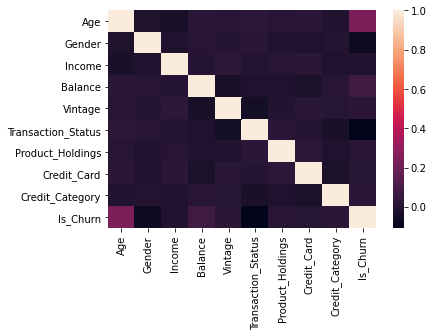

In [36]:
# Correlation HeatMap

import seaborn as sns
sns.heatmap(corr)

In [37]:
# This Loop will delete that columns which are highly Correlated

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_copy.columns[columns]
df_copy = df_copy[selected_columns]

In [38]:
# display data
df_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,0.627451,0,3.0,0.359323,2,1,1.0,1,2.0,0
2,0.274510,0,2.0,0.287925,2,1,0.0,0,1.0,0
5,0.196078,0,0.0,0.045541,4,1,1.0,0,2.0,0
6,0.686275,1,0.0,0.439982,2,1,0.0,1,0.0,0
9,0.215686,0,1.0,0.316321,3,0,1.0,1,2.0,0


# Modelling Part


In [39]:
result = pd.DataFrame()
result['Is_Churn'] = df_copy['Is_Churn']

C:\Users\Akriti Kumari Mahto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Akriti Kumari Mahto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Akriti Kumari Mahto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

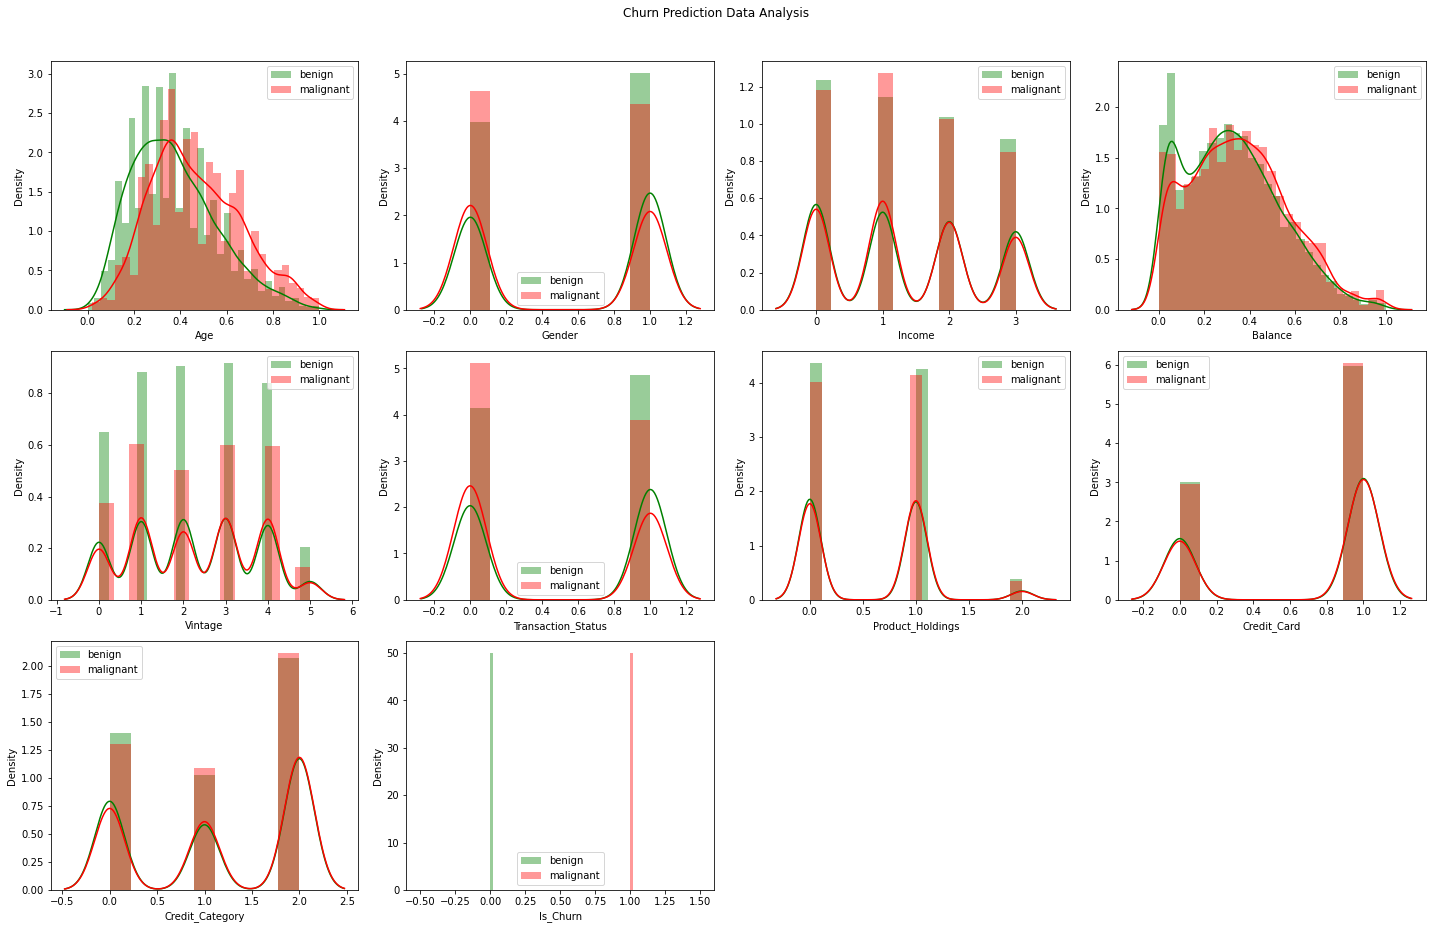

In [40]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df_copy.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df_copy[i][result['Is_Churn']==0], color='g', label = 'benign')
    sns.distplot(df_copy[i][result['Is_Churn']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Churn Prediction Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [41]:
# Storing the Data into X , y for modelling part
X = df_copy.drop(['Is_Churn'], axis=1)
y = df_copy['Is_Churn']

In [42]:
# Here applying Statistical Analysis by using Generalised Linear Model Regression or Ordinary least-squares to Check the 
# relationship between the dependent and independent Variables
# So the Columns which has Value Greater than P-Value than Significance Value (0.05) are not Signicant for the target or less 
# Contribute for Target Variable 

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as ms
from scipy import stats


X2 = ms.add_constant(X)
est = ms.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Is_Churn   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     90.22
Date:                Mon, 21 Mar 2022   Prob (F-statistic):          4.85e-162
Time:                        11:52:59   Log-Likelihood:                -6567.3
No. Observations:                9613   AIC:                         1.315e+04
Df Residuals:                    9603   BIC:                         1.323e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2210      0

In [43]:
np.exp(est2.params)

const                 1.247315
Age                   1.834364
Gender                0.935416
Income                0.998908
Balance               1.178550
Vintage               1.004791
Transaction_Status    0.896044
Product_Holdings      1.008003
Credit_Card           1.005509
Credit_Category       1.008818
dtype: float64

# Final Modelling

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.33,random_state=22)

In [59]:
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)

(6440, 9) (6440,)
(3173, 9) (3173,)


In [91]:
df_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,0.627451,0,3.0,0.359323,2,1,1.0,1,2.0,0
2,0.274510,0,2.0,0.287925,2,1,0.0,0,1.0,0
5,0.196078,0,0.0,0.045541,4,1,1.0,0,2.0,0
6,0.686275,1,0.0,0.439982,2,1,0.0,1,0.0,0
9,0.215686,0,1.0,0.316321,3,0,1.0,1,2.0,0


In [48]:

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize

# Building the Logistic Regression , Decision Tree Classifier and Naive Bayes Model
algos = [LogisticRegression(),DecisionTreeClassifier(), GaussianNB(),RandomForestClassifier(),XGBClassifier()]
         
names = ['Logistic Regression', 'Decision Tree Classifier','Gaussian NB','RandomForestClassifier','XGBClassifier']

rmse_list = []
acc_list=[]
MSE=[]



LogisticRegression()
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1708
           1       0.59      0.51      0.55      1465

    accuracy                           0.61      3173
   macro avg       0.61      0.61      0.60      3173
weighted avg       0.61      0.61      0.61      3173

0.6123542388906398
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1708
           1       0.74      0.91      0.82      1465

    accuracy                           0.81      3173
   macro avg       0.82      0.82      0.81      3173
weighted avg       0.83      0.81      0.81      3173

0.810274188465175
GaussianNB()
              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1708
           1       0.59      0.47      0.52      1465

    accuracy                           0.60      3173
   macro avg       0.60      0.5

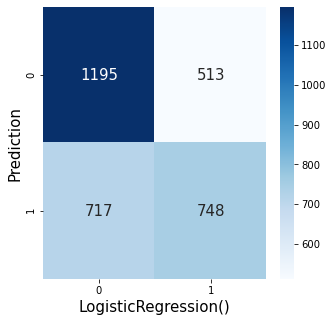

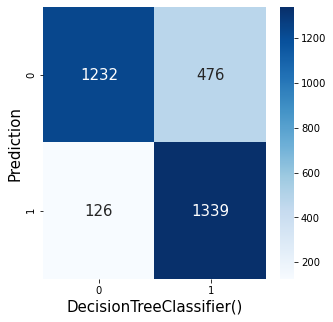

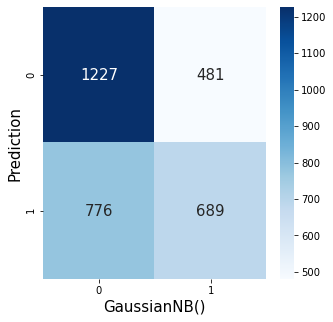

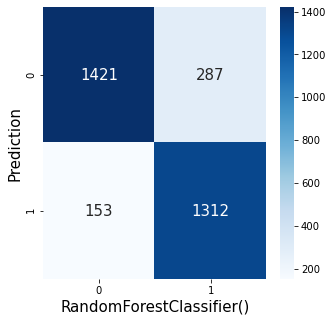

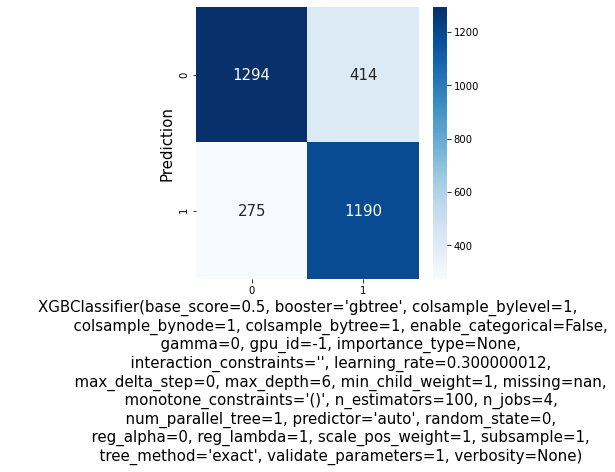

In [49]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    mse1=metrics.mean_squared_error(y_valid,y_pred)
    MSE.append(mse1)
    acc_list1=accuracy_score(y_valid,y_pred)
    acc_list.append(acc_list1)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(model, fontsize=15)
    print(model)
    print(classification_report(y_valid,y_pred))
    print(accuracy_score(y_valid,y_pred))

# SMOTE

In [96]:
#Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
X_smote

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.509804,0,1.0,0.030957,3,0,0.0,1,2.0
1,0.627451,0,0.0,0.552716,0,0,0.0,1,2.0
2,0.098039,1,1.0,0.572904,3,1,1.0,1,2.0
3,0.745098,0,1.0,0.342962,1,0,1.0,1,0.0
4,0.450980,1,3.0,0.513946,4,1,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...
6847,0.392157,0,1.0,0.127799,1,1,0.0,0,2.0
6848,0.431373,0,0.0,0.328740,2,0,0.0,0,2.0
6849,0.666667,1,3.0,0.079549,4,0,1.0,1,2.0
6850,0.490196,0,3.0,0.358794,0,1,2.0,1,2.0


In [70]:
y_smote.value_counts()


0    3426
1    3426
Name: Is_Churn, dtype: int64

In [95]:
lr_smote = LogisticRegression(solver='liblinear').fit(X_smote, y_smote)
knn_smote = KNeighborsClassifier( weights='distance').fit(X_smote, y_smote)
RF_smote = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_smote, y_smote)

y_pred_smote = list()
y_prob_smote = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr_smote, knn_smote, RF_smote]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_smote.append(pd.Series(mod.predict(X_valid), name=lab))
    y_prob_smote.append(pd.Series(mod.predict_proba(X_valid).max(axis=1), name=lab))
    
y_pred_smote = pd.concat(y_pred_smote, axis=1)
y_prob_smote = pd.concat(y_prob_smote, axis=1)


logistics_regression
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1708
           1       0.58      0.59      0.59      1465

    accuracy                           0.62      3173
   macro avg       0.61      0.62      0.62      3173
weighted avg       0.62      0.62      0.62      3173

knn
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1708
           1       0.89      0.97      0.93      1465

    accuracy                           0.93      3173
   macro avg       0.93      0.94      0.93      3173
weighted avg       0.94      0.93      0.93      3173

random_forest
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1708
           1       0.94      0.97      0.95      1465

    accuracy                           0.96      3173
   macro avg       0.96      0.96      0.96      3173
weighted avg       0.96      0.96  

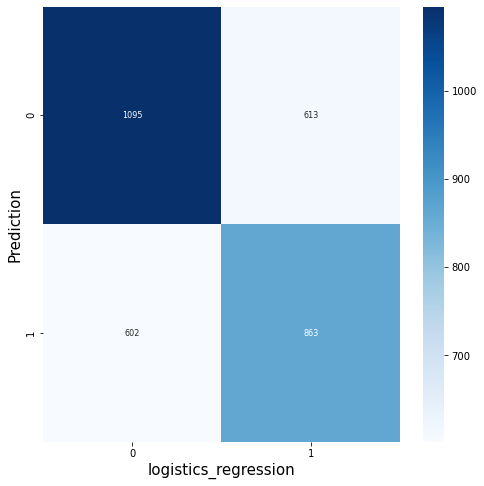

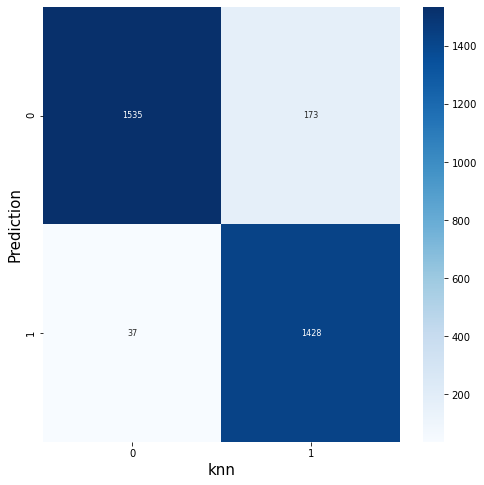

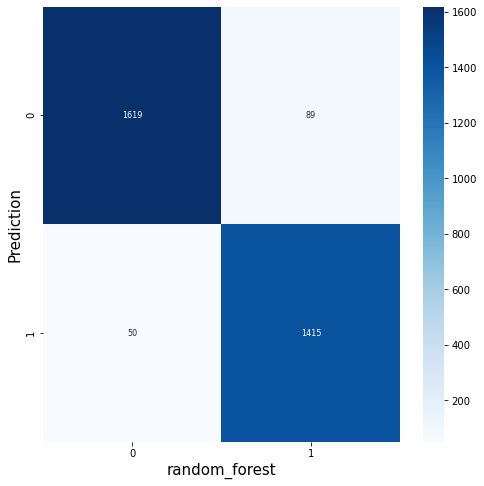

In [73]:
for cols in y_pred_smote.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_valid, y_pred_smote[cols]), annot=True, fmt='d', annot_kws={"size": 8}, cmap = 'Blues')  
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)
    print(cols)
    print(classification_report(y_valid, y_pred_smote[cols]))

In [106]:
test_copy = df_test.drop('ID',axis = 1)
test_copy

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.568627,Female,More than 15L,0.413891,2,1,2,1,Average
1,0.294118,Male,5L - 10L,0.139709,2,0,2,1,Average
2,0.078431,Female,10L - 15L,0.179983,0,0,2,1,Good
3,0.392157,Male,Less than 5L,0.011128,0,1,2,1,Poor
4,0.529412,Male,More than 15L,0.453303,2,1,3+,0,Good
...,...,...,...,...,...,...,...,...,...
2846,0.372549,Female,10L - 15L,0.549434,0,0,1,1,Poor
2847,0.529412,Female,More than 15L,0.594567,0,1,2,1,Average
2848,0.745098,Male,More than 15L,0.451666,3,0,1,1,Poor
2849,0.254902,Female,5L - 10L,0.616980,2,0,1,1,Poor


In [107]:
# Label Encoder on Test DataSet
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns
for column in test_copy.columns:
    if test_copy[column].dtype == object and column != 'ID':
        if test_copy[column].nunique() == 2:
            #apply Label Encoder for binary ones
            test_copy[column] = le.fit_transform(test_copy[column]) 
        else:
            dummy_columns.append(column)
#apply get dummies for selected columns
#test_copy = pd.get_dummies(data = test_copy,columns = dummy_columns)

In [108]:
# Ordinal Encoder on test Dataset

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(test_copy[dummy_columns])
test_copy[dummy_columns] = pd.DataFrame(data_encoded, columns=dummy_columns)
test_copy

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.568627,0,3.0,0.413891,2,1,1.0,1,0.0
1,0.294118,1,1.0,0.139709,2,0,1.0,1,0.0
2,0.078431,0,0.0,0.179983,0,0,1.0,1,1.0
3,0.392157,1,2.0,0.011128,0,1,1.0,1,2.0
4,0.529412,1,3.0,0.453303,2,1,2.0,0,1.0
...,...,...,...,...,...,...,...,...,...
2846,0.372549,0,0.0,0.549434,0,0,0.0,1,2.0
2847,0.529412,0,3.0,0.594567,0,1,1.0,1,0.0
2848,0.745098,1,3.0,0.451666,3,0,0.0,1,2.0
2849,0.254902,0,1.0,0.616980,2,0,0.0,1,2.0


In [109]:
from sklearn.preprocessing import MinMaxScaler
col_names = ['Age','Balance']
features = test_copy[col_names]
scaler =  MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
test_copy[col_names] = features
test_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.568627,0,3.0,0.413891,2,1,1.0,1,0.0
1,0.294118,1,1.0,0.139709,2,0,1.0,1,0.0
2,0.078431,0,0.0,0.179983,0,0,1.0,1,1.0
3,0.392157,1,2.0,0.011128,0,1,1.0,1,2.0
4,0.529412,1,3.0,0.453303,2,1,2.0,0,1.0


In [110]:
# Making Predictions on Test Data
submission = pd.read_csv('sample_OoSmYo5.csv')
model = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
model.fit(X_smote, y_smote)
final_predictions = model.predict(test_copy)
submission['Is_Churn'] = final_predictions
#only positive predictions for the target variable
submission['Is_Churn'] = submission['Is_Churn'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission5.csv', index=False)